# <font color=red>1. 了解背景和目標</font><br>

## [背景](https://www.kaggle.com/c/titanic#description)

- The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew.** This sensational tragedy shocked the international community and led to better safety regulations for ships.

> - Titanic 沈船事件中，總共2224人中有1502人喪身。

- One of the reasons that the shipwreck led to such loss of life was that **there were not enough lifeboats for the passengers and crew**. Although there was some element of luck involved in surviving the sinking, **some groups of people were more likely to survive than others, such as women, children, and the upper-class.**

> - 這麼多人喪身最主要的原因就是救生艇的不足。
> - 但獲救的人並不是隨機的，例如女人，小孩，頭等艙乘客等獲救的機會較大。

- In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> - **這個比賽目標，要根據訓練乘客的個人資訊以及存活狀況，嘗試去利用machine learning的方式去預測測試數據中乘客的存活狀況。**

# <font color=red>2. 了解評分標準</font><br>

## [評分標準](https://www.kaggle.com/c/titanic#evaluation)

# <font color=red>3. 認識數據</font><br>

- [Pandas - 數據分析](https://pandas.pydata.org/pandas-docs/stable/index.html)
 - .columns (認識數據欄位)
 - .info() (認識數據的型別跟數量)
 - .describe() (認識數據分佈)
 
- [matplotlib - 圖表分析](https://matplotlib.org/contents.html)
 - 不同欄位的獲救情況。


In [14]:
import pandas as pd  # 用於數據分析
import numpy as np # 用於科學計算
from pandas import Series,DataFrame

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['simhei'] # 處理圖表中文顯示

import matplotlib.pyplot as plt # 用於圖表繪製

data_train = pd.read_csv("Train.csv") # 讀取數據

 - [matplotlib .pyplot 在MAC設定繁體中文字型](https://medium.com/@wulala505/matplotlib-pyplot-%E5%9C%A8mac%E8%A8%AD%E5%AE%9A%E7%B9%81%E9%AB%94%E4%B8%AD%E6%96%87%E5%AD%97%E5%9E%8B-88f5b027a352)

In [15]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 透過head，columns先快速預覽數據。

In [16]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- 透過info觀察欄位的type跟資料的缺失狀況。
 - training 數據總共有891筆。
 - Embarked, Age 都有資料缺失。

In [18]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 透過describe觀察數值型特徵的基本分佈。
 - 平均年齡29歲。
 - 平均生存機率是38%。

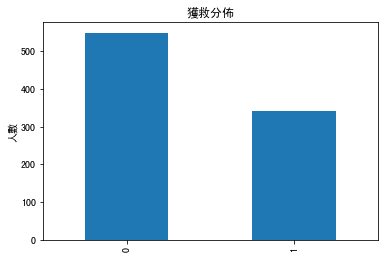

In [19]:
# 基本分佈
fig = plt.figure() # 建立圖表物件
fig.set(alpha=0.2) # 設定圖表顏色alpha值

data_train.Survived.value_counts().plot(kind='bar') # 統計生存人數，並繪製成長條圖
plt.title("獲救分佈") # 圖表title
plt.ylabel("人數")
 
plt.show()

- 死亡多過於生還。

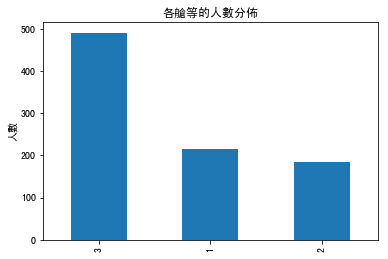

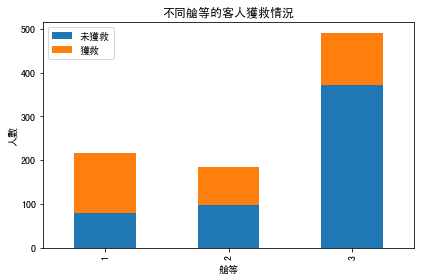

In [20]:
# 艙等 VS 獲救

data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel("人數")
plt.title("各艙等的人數分佈")

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'獲救':Survived_1, '未獲救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("不同艙等的客人獲救情況")
plt.xlabel('艙等')
plt.ylabel('人數')

plt.tight_layout() # Improve spacing between subplots and display them
plt.show()

- 三等艙人數最多，頭等艙人數最少。
- 頭等艙生還比例最高，三等艙生還比例最低。

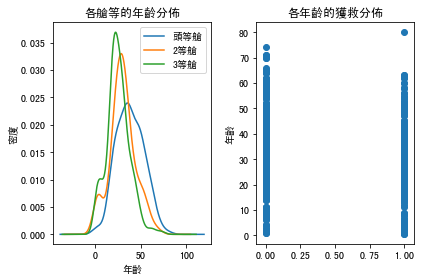

In [21]:
# 年齡 VS 獲救

plt.subplot(1, 2, 1) 
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年齡")
plt.ylabel("密度")
plt.title("各艙等的年齡分佈")
plt.legend(('頭等艙','2等艙','3等艙'), loc='best')

plt.subplot(1, 2, 2) 
plt.scatter(data_train.Survived, data_train.Age)
plt.title("各年齡的獲救分佈")
plt.ylabel("年齡")

plt.tight_layout() # Improve spacing between subplots and display them
plt.show()

- 頭等艙的平均年齡最大，三等艙的平均年齡最低。
- 生還者有一個超過80歲，60~80的人死亡比例最高。

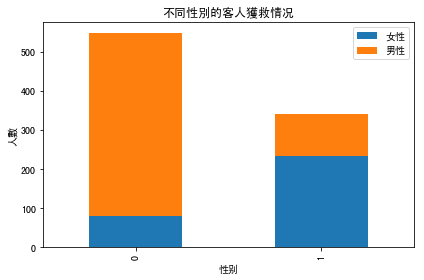

In [22]:
# 性別 VS 獲救

Survivied_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survivied_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性': Survivied_m, '女性': Survivied_f})
df.plot(kind='bar', stacked=True)
plt.title("不同性別的客人獲救情况")
plt.xlabel("性别") 
plt.ylabel("人數")

plt.tight_layout()
plt.show()

- 女性生還比例遠大於男性。

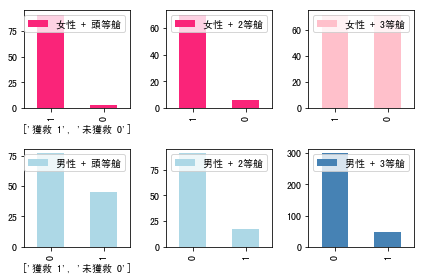

In [23]:
# 性別＋艙等 VS 獲救

fig=plt.figure()
fig.set(alpha=0.65) 
plt.title("不同性別+不同艙等的客人獲救情况")

plt.subplot(2, 3, 1) 
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 1].value_counts().plot(kind = 'bar', label = "female highclass", color = '#FA2479')
plt.xlabel(["獲救 1", "未獲救 0"], rotation = 0)
plt.legend(["女性 + 頭等艙"], loc='best')

plt.subplot(2, 3, 2) 
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 2].value_counts().plot(kind = 'bar', label = "female highclass", color = '#FA2479')
plt.legend(["女性 + 2等艙"], loc='best')

plt.subplot(2, 3, 3) 
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
plt.legend(["女性 + 3等艙"], loc='best')

plt.subplot(2, 3, 4) 
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 1].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
plt.xlabel(["獲救 1", "未獲救 0"], rotation = 0)
plt.legend(["男性 + 頭等艙"], loc='best')

plt.subplot(2, 3, 5) 
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 2].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
plt.legend(["男性 + 2等艙"], loc='best')

plt.subplot(2, 3, 6) 
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
plt.legend(["男性 + 3等艙"], loc='best')

plt.tight_layout()
plt.show()

- 男性 + 3等艙的生還比例最低。
- 女性 + 頭等艙的生還比例最高。

In [24]:
# 親戚個數 VS 獲救

g = data_train.groupby(['SibSp','Survived']) # 堂兄弟/妹個數
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

- 堂兄弟/妹個數跟生還比例似乎沒太大關聯。

In [25]:
g = data_train.groupby(['Parch','Survived']) # 父母/小孩個數
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

- 父母/小孩個數跟生還比例似乎沒太大關聯。

In [26]:
# 船票編號 VS 獲救
# ticket是船票編號，是unique的，和最后的结果没有太大的關聯，不納入考慮的特徵值

In [27]:
# 船艙 VS 獲救
# cabin只有204個乘客有值，先觀察它的分布

data_train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
E101               3
F33                3
C22 C26            3
F2                 3
D                  3
C124               2
C52                2
F4                 2
B18                2
C2                 2
B5                 2
C92                2
C123               2
B77                2
C93                2
B57 B59 B63 B66    2
D35                2
E121               2
B20                2
D20                2
C78                2
C125               2
E44                2
B58 B60            2
B35                2
D36                2
C65                2
                  ..
A5                 1
B79                1
B4                 1
E12                1
C118               1
C128               1
C87                1
B42                1
A36                1
B69                1
C32                1
E17                1
E10                1
C54                1
C50                1
D11                1
B86          

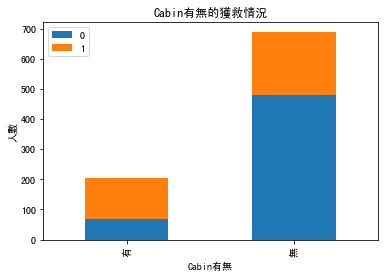

In [28]:
# 船艙資訊有無 VS 獲救

fig = plt.figure()
fig.set(alpha = 0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts() # 有cabin資訊且存活下來的個數
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts() # 無cabin資訊且存活下來的個數

df = pd.DataFrame({'有':Survived_cabin, '無': Survived_nocabin}).transpose()
df.plot(kind = 'bar', stacked = True)

plt.title('Cabin有無的獲救情況')
plt.xlabel('Cabin有無')
plt.ylabel('人數')
plt.show()

- 有cabin資訊的獲救比例比較高。

# <font color=red>4. 特徵工程(數據預處理)</font><br>

- ### 處理資料缺失的方式

- ### 非數值資料的處理

- ### 正規化

In [29]:
# 處理資料缺失的方式 - Cabin

# 按Cabin有無數據，將這個特徵專化成Yes和No兩種類型

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train = set_Cabin_type(data_train)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,No,C


In [30]:
# 處理資料缺失的方式 - Age

# 使用 RandomForestClassifier 填補缺失的年齡資訊

from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    
    # 把已有的數值特徵取出來丟進去Random Forest Regressor
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目標年龄
    y = known_age[:, 0]

    # X即特徵属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型對未知年齡進行預測
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的預測結果來填補原先缺失的數據
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    
    return df, rfr

data_train, rfr = set_missing_ages(data_train)

data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [31]:
# 非數值資料的處理

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix = 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis = 1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


In [32]:
# 正規化 - Age, Fare

import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337


In [33]:
# test_data也需要進行相同的數據預處理

# 讀取測試數據
data_test = pd.read_csv("test.csv")

# 處理Fare資訊
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0

# 處理Age資訊
df_temp = data_test[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']] # array -> frame
data_null_age = df_temp[data_test.Age.isnull()].as_matrix()
# 根據特徵屬性X預測年齡並填補
X = data_null_age[:, 1:]
predictedAges = rfr.predict(X) 
data_test.loc[(data_test.Age.isnull()), 'Age'] = predictedAges


# 處理Cabin資訊
data_test = set_Cabin_type(data_test)

# 非數值資料的處理
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

# 欄位整理
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis = 1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True )

# 正規化處理
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)

df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740


# <font color=red>5. 建立模型</font><br>

In [34]:
from sklearn import linear_model

# 從training data從取出所需的feature欄位
train_df = df.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 轉成numpy
train_np = train_df.as_matrix()

# Survival的結果
y = train_np[:, 0]

# 特徵值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression()
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# 從test data從取出所需的feature欄位
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 將test資料丟入剛訓練好的model
predictions = clf.predict(test)

result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index = False)

In [36]:
pd.read_csv("logistic_regression_predictions.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 將預測結果傳到kaggle進行評分 準確度77.5%

# <font color=red>6. 模型狀態分析</font><br>

- ### cross validation很重要

- ### 分析錯誤例子

- ### 利用learning curve判斷模型目前是overfitting或underfitting

In [40]:
from sklearn.model_selection import cross_val_score

# 先觀察目前CV的分數
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]

print (cross_val_score(clf, X, y))

[0.8013468  0.7979798  0.81481481]


In [48]:
from sklearn.model_selection import train_test_split

# 分割數據，按照training(7):CV(3)的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)

# 利用training生成模型
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 利用生成的模型對CV數據進行預測
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

# 找出預測錯誤的case
origin_data_train = pd.read_csv("/Users/htaiwan/Documents/H_Git/Kaggle/Kaggle_Titanic/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


# <font color=red>7. 模型融合</font><br>